In [15]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sympy import *
%matplotlib notebook

x1 = symbols('x1')
u1 = symbols('u1')

In [16]:
def TMA(A,d): #Tridiagonal matrix algorithm . Или метод прогонки
    n = len(d)
    P = np.zeros(n - 1)
    Q = np.zeros(n - 1)
    x = np.zeros(n)
    P[0] = A[0][1] / -A[0][0]
    Q[0] = -d[0] / -A[0][0]
    for i in range(1, n - 1): # находим прогоночные коэффициенты
        a = A[i][i-1]
        b = A[i][i]
        c = A[i][i+1]
        P[i] = c/(-b-a*P[i - 1])
        Q[i] =(a*Q[i - 1]-d[i])/(-b-a*P[i - 1])
    x[-1] = (A[n - 1][n - 2]*Q[n - 2] - d[n - 1]) / (-A[n - 1][n - 1] - A[n - 1][n - 2]*P[n - 2])
    for i in range(n-2, -1, -1): # Находим неизвекстные
        x[i] = P[i] * x[i + 1] + Q[i]
    return(x)

In [17]:
def solutionMatrixStart(): # заполнение матрицы решений краевыми условиями
    x = np.linspace(x0, L, N)
    u = np.zeros((N, KT))
    
    for i in range(0, KT): 
        u[0][i] = 0
        u[-1][i] = 0

    for i in range(0, N):
        u[i][0] = 0
        if x[i] <= D:
            u[i][0] = 1
        u[0][0] = 0
    return u, x

In [18]:
D = 20. #Хаотичное движение популяции
a = 9 # Рождаймость
K = 1.5 # количество ресурсов
sigma = 5# смертность

N = 10 #количество точек по оси OX
x0 = 0. # начало отрезка 
L = 100. # конец отрезка
h = (L - x0) / (N - 1) # шаг по OX

KT = 1000 #количество точек по времени
t0 = 0. # начальный момент времени
T = 100. # конечный момент времени
tau = (T - t0) / (KT - 1) # шаг по времени

s = tau*D/h**2

A = np.zeros((N - 2, N - 2))
d = np.zeros((N - 2))

$$F(u)=au^k_j\cdot(1-u^{k+1}_j/K)- \sigma u^{k+1}_j$$

In [19]:
u, x = solutionMatrixStart()

for i in range(1,KT): #заполняем трехдиагональную матрицу Ax=d
    A[0, 0] = - 2*sigma - (a*tau*u[1][i - 1])/K - sigma*tau - 1
    A[0, 1] = sigma
    d[0] = (a*tau+1)*(-u[1][i - 1]) - sigma*u[0][i]
    #print(sigma*u[0][i])

    for j in range(1, N-3):
        A[j, j - 1] = sigma
        A[j, j] = - 2*sigma - (a*tau*u[j + 1][i - 1])/K - sigma*tau - 1
        A[j, j + 1] = sigma
        d[j] = (a*tau+1)*(-u[j + 1][i - 1])
    
    A[N - 3, N - 3] = - 2*sigma - (a*tau*u[N-2][i - 1])/K - sigma*tau - 1
    A[N - 3, N - 4] = sigma
    d[N - 3] = (a*tau+1)*(-u[N-2][i - 1]) - sigma*u[N - 1][i]
    #print (A,d)
    u[1:N - 1, i] = TMA(A, d)

D = 20.0 a = 9 K = 1.5 sigma = 5


<IPython.core.display.Javascript object>


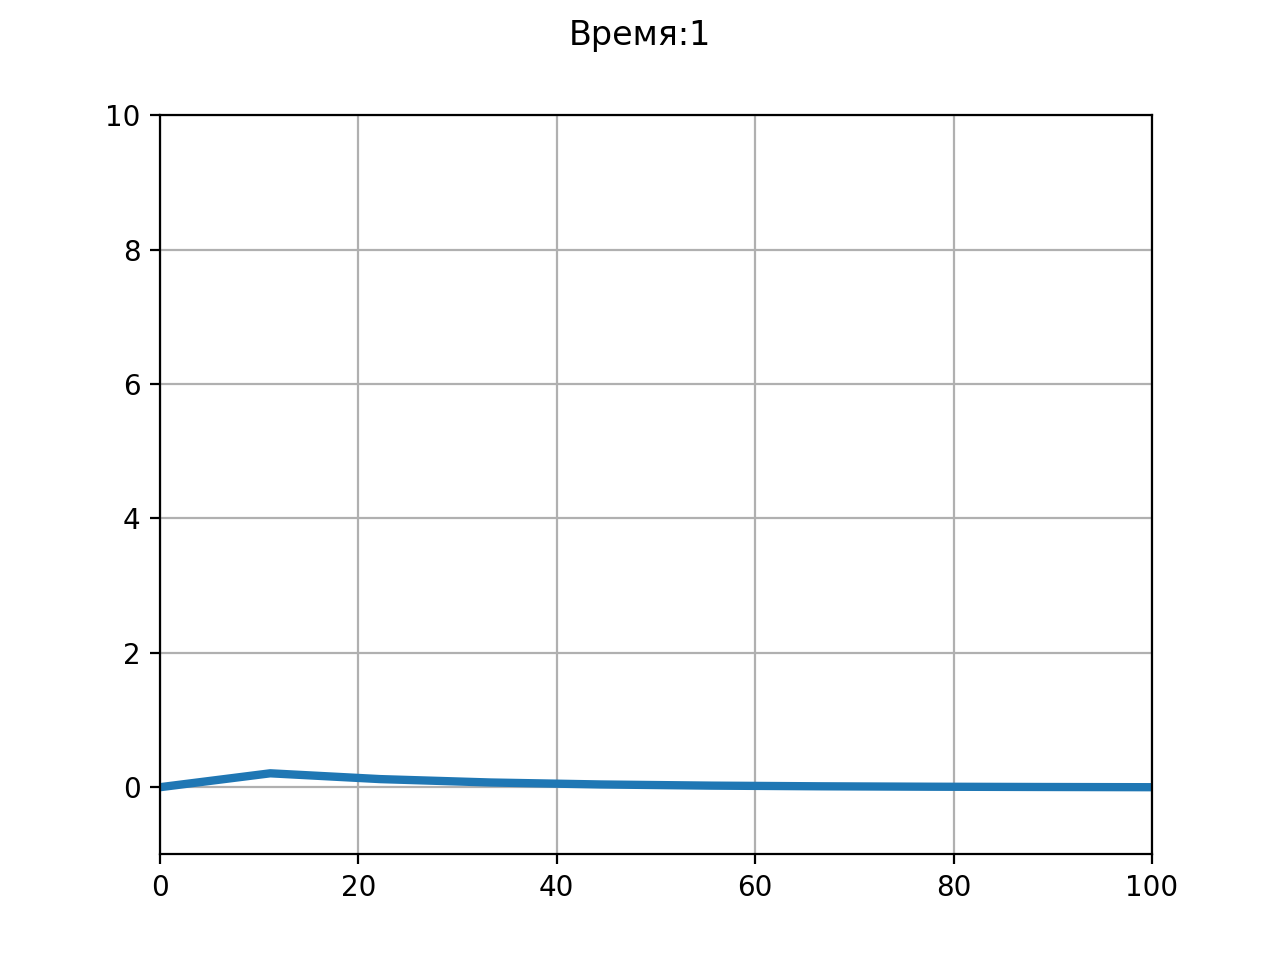

In [20]:
print("D = " + str(D) + ' a = ' + str(a) + " K = " + str(K) + " sigma = " + str(sigma))
fig = plt.figure(facecolor='white')
ax = plt.axes(xlim=(0, L), ylim=(-1, 10) )
line, = ax.plot([ ], [ ], lw=3)
def redraw(i):
    line.set_data(x, u[:,i])
    string = 'Время:'+str(i)
    plt.suptitle(string)
anim = animation.FuncAnimation(fig,redraw,frames=KT,interval=500)
plt.grid(True)
plt.show()

In [21]:
u, x = solutionMatrixStart()

def Kt(t):
    return 20/t

for i in range(1,KT): #заполняем трехдиагональную матрицу Ax=d
    A[0, 0] = - 2*sigma - (a*tau*u[1][i - 1])/Kt(i) - sigma*tau - 1
    A[0, 1] = sigma
    d[0] = (a*tau+1)*(-u[1][i - 1]) - sigma*u[0][i]  

    for j in range(1, N-3):
        A[j, j - 1] = sigma
        A[j, j] = - 2*sigma - (a*tau*u[j + 1][i - 1])/Kt(i) - sigma*tau - 1
        A[j, j + 1] = sigma
        d[j] = (a*tau+1)*(-u[j + 1][i - 1])
    
    A[N - 3, N - 3] = - 2*sigma - (a*tau*u[N-2][i - 1])/Kt(i) - sigma*tau - 1
    A[N - 3, N - 4] = sigma
    d[N - 3] = (a*tau+1)*(-u[N-2][i - 1]) - sigma*u[N - 1][i]
    #print (A,d)
    u[1:N - 1, i] = TMA(A, d)

D = 20.0 a = 9 K = 20/t sigma = 5


<IPython.core.display.Javascript object>


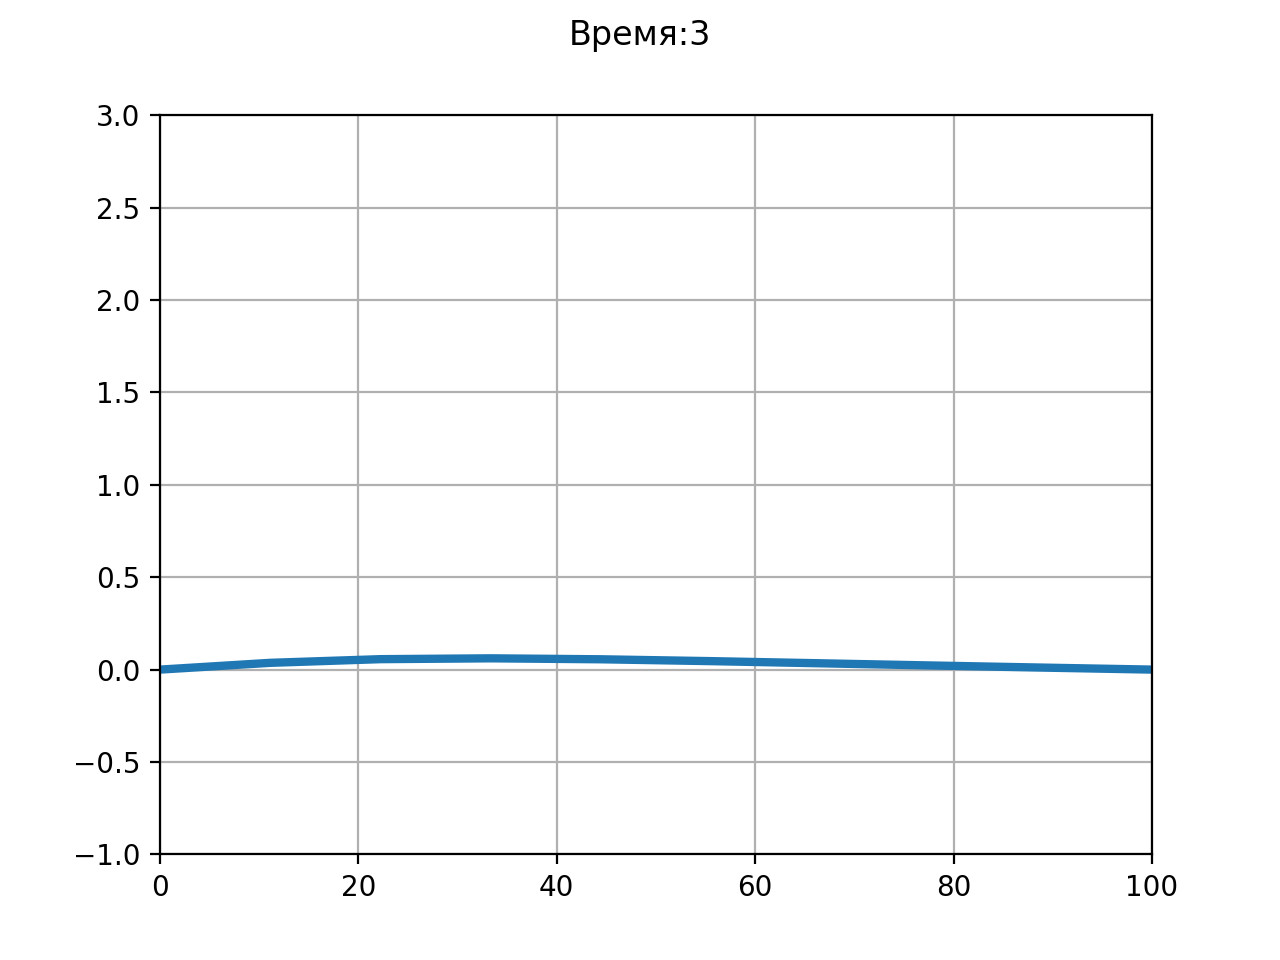

In [22]:
print("D = " + str(D) + ' a = ' + str(a) + " K = 20/t" + " sigma = " + str(sigma))
fig = plt.figure(facecolor='white')
ax = plt.axes(xlim=(0, L), ylim=(-1, 3) )
line, = ax.plot([ ], [ ], lw=3)
def redraw(i):
    line.set_data(x, u[:,i])
    string = 'Время:'+str(i)
    plt.suptitle(string)
anim = animation.FuncAnimation(fig,redraw,frames=KT,interval=500)
plt.grid(True)
plt.show()

In [ ]:
K = 10
K1 = 1

def KTI(u1):
    return K + K1 * integrate(u1, (x1, x0, L))


u, x = solutionMatrixStart()
for i in range(1,KT): #заполняем трехдиагональную матрицу Ax=d
    A[0, 0] = - 2*sigma - (a*tau*u[1][i - 1])/KTI(u[1][i-1]) - sigma*tau - 1
    A[0, 1] = sigma
    d[0] = (a*tau+1)*(-u[1][i - 1]) - sigma*u[0][i]  

    for j in range(1, N-3):
        A[j, j - 1] = sigma
        A[j, j] = - 2*sigma - (a*tau*u[j + 1][i - 1])/KTI(u[j][i - 1]) - sigma*tau - 1
        A[j, j + 1] = sigma
        d[j] = (a*tau+1)*(-u[j + 1][i - 1])
    
    A[N - 3, N - 3] = - 2*sigma - (a*tau*u[N-2][i - 1])/KTI(u[N-2][i - 1]) - sigma*tau - 1
    A[N - 3, N - 4] = sigma
    d[N - 3] = (a*tau+1)*(-u[N-2][i - 1]) - sigma*u[N - 1][i]
    #print (A,d)
    u[1:N - 1, i] = TMA(A, d)

D = 20.0 a = 9 sigma = 5 K0 = 10 K1 = 1


<IPython.core.display.Javascript object>


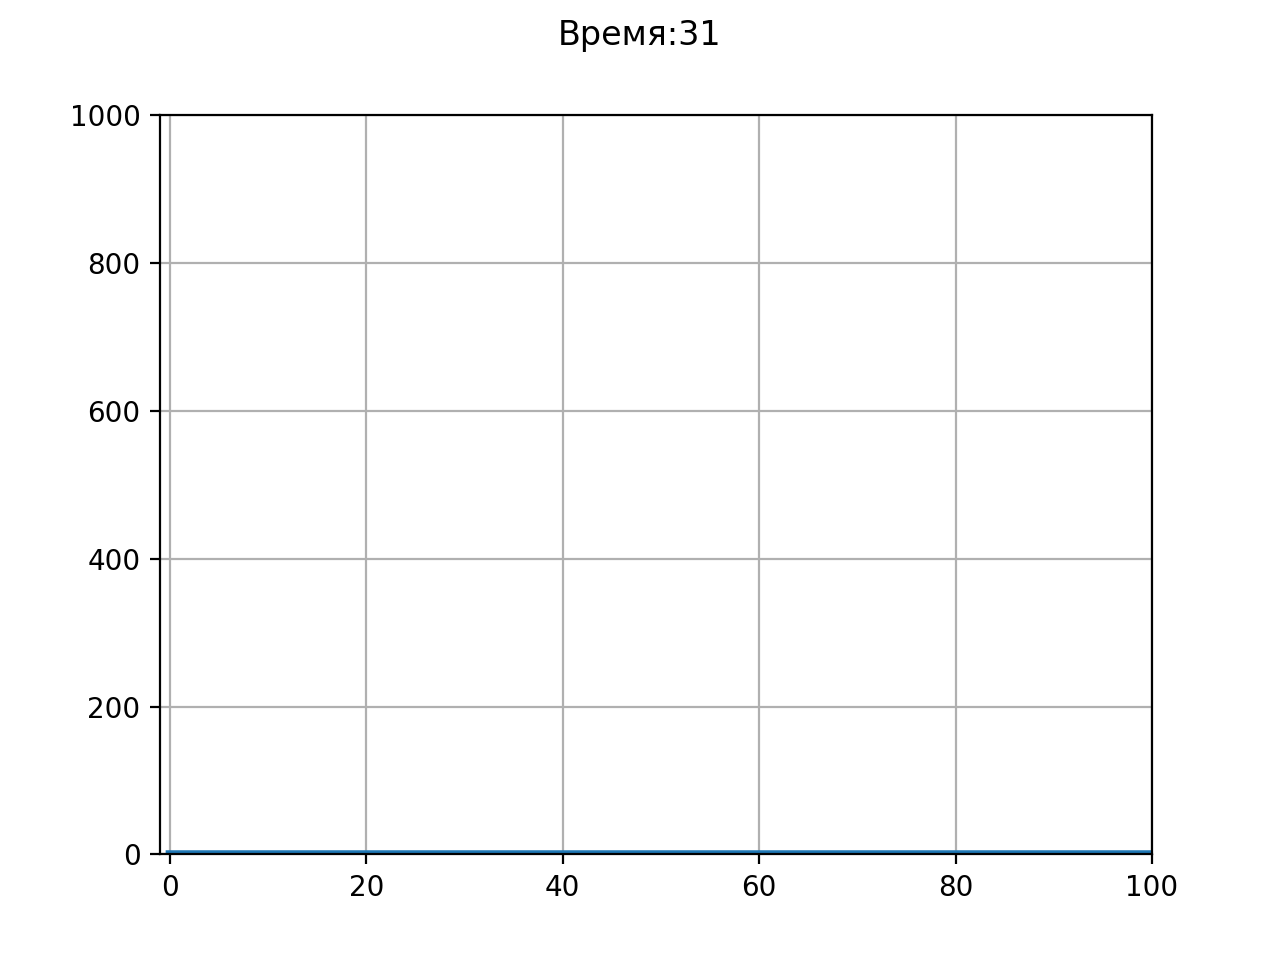

In [46]:
print("D = " + str(D) + ' a = ' + str(a) + " sigma = " + str(sigma) + " K0 = " + str(K) + " K1 = " + str(K1))
fig = plt.figure(facecolor='white')
ax = plt.axes(xlim=(-1, L), ylim=(0, 1000) )
line, = ax.plot([ ], [ ], lw=3)
def redraw(i):
    line.set_data(x, u[:,i])
    string = 'Время:'+str(i)
    plt.suptitle(string)
anim = animation.FuncAnimation(fig,redraw,frames=KT,interval=500)
plt.grid(True)
plt.show()